# Aufgabe: Volatilitäts-Analyse DAX und STOXX

* Laden Sie die verfügbaren Daten des Dax-Performance-Index von Yahoo-Finance. Kürzel: `^GDAXI` ab 1.1.2000

In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from datetime import date
dax = data.DataReader('^GDAXI', start='01/01/2000', data_source='yahoo')
#dax.to_pickle('Dax_Panda') 
dax

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961
...,...,...,...,...,...,...
2021-03-02,14101.790039,13961.620117,13962.070312,14039.799805,63307700.0,14039.799805
2021-03-03,14197.490234,13979.730469,14130.860352,14080.030273,84766900.0,14080.030273
2021-03-04,14095.809570,13959.269531,14015.440430,14056.339844,84620900.0,14056.339844


* Berechnen Sie die täglichen Renditen und jeweils über ein halbes Jahr (126 Tage) den rollierenden Mittelwert des Kurses und rollierend Standardabweichung der Renditen über ein halbes Jahr (126 Tage)
* Bezieht sich das Datum bei den rollierenden Berechnung auf den Begin, das Ende oder den Mittelpunkt des jeweiligen Betrachtungszeitpunkt?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1144f9460>,
      dtype=object)

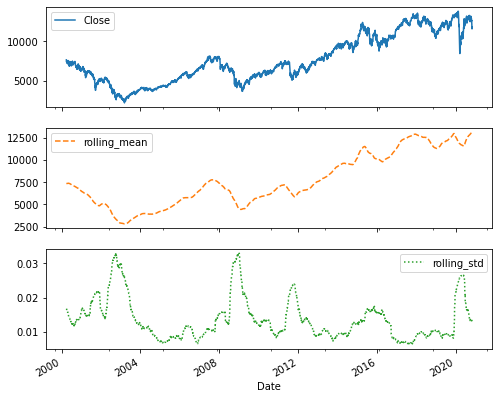

In [13]:
dax['ret'] = dax['Close']/dax['Close'].shift()
rolling = dax['Close'].rolling(126, center=True)
dax['rolling_mean'] = rolling.mean()
rolling = dax['ret'].rolling(126, center=True)
dax['rolling_std'] = rolling.std()
dax[dax['rolling_mean'].notna()][['Close', 'rolling_mean', 'rolling_std']].plot(subplots=True,style=['-', '--', ':'], figsize=(8, 7))

#### Analyse

* Kommt es zu 'Volatilitäts-Cluster', also Marktphasen mit anhaltend höherer Volatität? Beschreiben Sie in einem Satz.
* Gibt es einen Zusammenhang zwischen bestimmten Trends und der Markt-Volatilität? (Ein Satz)
* In welchen Marktphasen würde Sie lieber keine Optionen schreiben? (Ein Satz)


### Eurostoxx Analyse
* Jetzt wollen wir den EUROSTOX und den VSTOXX herunterladen und dann noch die echte Vola berechnen.
* Die Volatilität ist immer annualisiert und bezieht sich auch unterschiedliche Laufzeiten.

In [5]:
import pandas as pd
import urllib.request

path = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
vstoxx = pd.read_csv(path,
   index_col=0, 
   parse_dates=True, 
   dayfirst=True,
   header=2)

vstoxx.to_csv('/Users/jonasvogt/PycharmProjects/vstoxx.csv')

vstoxx

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533


###### * V2TX = The actual EURO STOXX 50 Volatility values

* V6I1 = VSTOXX 1 month

* V6I2 = VSTOXX 2 months

* ...

* Wir brauchen nur 'V2TX'

In [6]:

path ='http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
columns = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
           'SXXF', 'SXXA', 'DK5F', 'DKXF', 'EMPTY']
stoxx = pd.read_csv(path,
                 index_col=0,
                 parse_dates=True,                 
                 dayfirst=True,
                 header=None,
                 skiprows=4, 
                 names=columns,
                 sep=';'
                 )  
del stoxx['EMPTY']

stoxx.to_csv('/Users/jonasvogt/PycharmProjects/stoxx.csv')
stoxx

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06
...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26


* Wir brauchen nur 'SX5P' als den den echten Stoxx Index. 

* Bauen Sie einen einen Datensatz, der ab 1999-01-04 den Stoxx Index (`SX5P`) und die implizite 3 Monats-Vola enhält. Mergen Sie anhand der Indizes und führen Sie einen inner Join durch.

In [28]:
stx = pd.merge(stoxx['SX5P'][stoxx.index >'1999-01-04'], 
         vstoxx['V6I3'][vstoxx.index >'1999-01-04'], how = 'inner', on = 'Date')
stx

,SX5P,V6I3
Date,,
1999-01-05,3535.30,32.6922
1999-01-06,3615.93,32.2186
1999-01-07,3566.02,36.1265
1999-01-08,3569.24,36.0813
1999-01-11,3504.20,39.9139
...,...,...
2016-02-08,2666.80,31.8308
2016-02-09,2617.05,32.6220
2016-02-10,2666.61,32.1438


* Berechnen Sie die nun die normale- und die Log-Rendite (ln(S_t/S_t-1) des Stoxx Index (`SX5P`).
* Berechnen Sie rollierend die Standardabweichung für die beiden Rendite Zeitreihen. Nutzen Sie hierzu die rolling-Methode für Pandas und nehmen Sie hierbei 75 Tages-Fenster (zum Vergleich mit den 3-Monats-VSTOXX Daten). Annualisieren Sie.
* Vergleichen Sie beide Varianten für die historische Volatilität. Was hätten Sie hier erwartet? Entscheiden Sie sich für eine Variante zum Vergleich mit dem VSTOXX.
* Verschieben Sie die das gewählte Maß für die historische Vola um 75 Tage, damit die in den nächsten 75 Tagen realisierte Volatilität in der selben Zeile steht, wie die implizierte Volatität und die in den letzten 60 Tagen realisierte Volailität. Nutzen Sie hierzu shift().
 

In [49]:
stx['Ret'] = stx['SX5P']/stx['SX5P'].shift() - 1                 
stx['Ret2'] = np.log(stx['SX5P']/stx['SX5P'].shift()) 
rolling = stx['Ret'].rolling(75)
stx['rolling_std'] = rolling.std()*np.sqrt(250)*100

rolling = stx['Ret2'].rolling(75)
stx['rolling_std2'] = rolling.std()*np.sqrt(250)*100

stx['rolling_std_plus60'] = stx['rolling_std'].shift(-76)
stx['rolling_std_plus602'] = stx['rolling_std2'].shift(-76)

stx[stx['rolling_std_plus60'].notna()]

print(stx.to_string())


## ANTWORT: WIR MÜSSEN MIT DER LOG-RENDITE RECHNEN UND DIE VOLA DER LOG-RENDITE AUSRECHNEN (SIEHE KAPIAL IN HULL AB S. 326)



               SX5P     V6I3       Ret      Ret2  rolling_std  rolling_std2  rolling_std_plus60  rolling_std_plus602
Date                                                                                                                
1999-01-05  3535.30  32.6922       NaN       NaN          NaN           NaN           21.612853            21.689225
1999-01-06  3615.93  32.2186  0.022807  0.022551          NaN           NaN           21.513177            21.590518
1999-01-07  3566.02  36.1265 -0.013803 -0.013899          NaN           NaN           21.850568            21.922395
1999-01-08  3569.24  36.0813  0.000903  0.000903          NaN           NaN           21.566447            21.636820
1999-01-11  3504.20  39.9139 -0.018222 -0.018390          NaN           NaN           21.514960            21.585346
1999-01-12  3468.15  40.5525 -0.010288 -0.010341          NaN           NaN           19.856412            19.862322
1999-01-13  3315.62  43.0083 -0.043980 -0.044977          NaN   

In [24]:
help(rolling)

Help on Rolling in module pandas.core.window.rolling object:

class Rolling(_Rolling_and_Expanding)
 |  Rolling(obj, window=None, min_periods: Union[int, NoneType] = None, center: Union[bool, NoneType] = False, win_type: Union[str, NoneType] = None, axis: Union[str, int] = 0, on: Union[str, pandas.core.indexes.base.Index, NoneType] = None, closed: Union[str, NoneType] = None, **kwargs)
 |  
 |  Provide rolling window calculations.
 |  
 |  Parameters
 |  ----------
 |  window : int, offset, or BaseIndexer subclass
 |      Size of the moving window. This is the number of observations used for
 |      calculating the statistic. Each window will be a fixed size.
 |  
 |      If its an offset then this will be the time period of each window. Each
 |      window will be a variable sized based on the observations included in
 |      the time-period. This is only valid for datetimelike indexes.
 |  
 |      If a BaseIndexer subclass is passed, calculates the window boundaries
 |      based on

* Jetzt wollen wir analysieren, welcher Zusammenang zwischen VSTOXX, historischer Vola und der Indexentwicklung besteht. 
* Besonders Interessant ist die Frage, ob die implizierte Volatilität die jeweils folgende historische Vola prognostizieren kann. 
* Ein guter Vergleichsmaßstab ist hierbei die schon berechnete historische Volatilität auf Basis der vergangenen 75 Tage.  
* Plotten Sie für Ihre Analyse die Wertentwicklung des STOXX, die vergangene und die vorrausschauend geplotteten empirischen Volatilität und den VSTOXX.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1187dde50>,
      dtype=object)

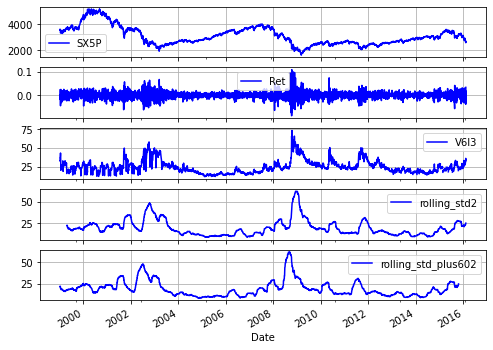

In [50]:
stx[['SX5P', 'Ret', 'V6I3','rolling_std2', 'rolling_std_plus602']].plot(subplots=True, grid=True, style='b', figsize=(8, 6))

* Analysieren Sie: Wie gut prognostiziert die implizite Vola die echte Vola? (1 Satz), was können Sie zu Volatility-Clustern sagen (1 Satz)?

* Wir sehen, dass ein starker Zusammenhang zwischem der implizierten Volatilität und der danach realisierten historischen Volatilität besteht.
* Auf graphischer Basis evaluiert, könnte man zum Schluss kommen, dass die implizierte Volatilität weniger "laggt" als die realisierte Vola.

* Nun wollen wir die Korrelation zwischen der zukünftigen historischen Vola und der vergangenen historischen Vola bzw. der implizierten Vola berechnen.
* Dazu wollen wir die .corr() Methode für Pandas verwenden.
* Anschließen wollen wir auch eine Regression durchführen, in der die kommende historische Volatilitä erklärt wird durch die verganene historische Vola bzw. die implizierte Vola.
* Hier zu verwenden wir 'import statsmodels.formula.api as sm'
* 'result = sm.ols(...).fit()'
* 'result.params'
* 'result.summary()'

In [52]:
stx[['rolling_std_plus602' ,'V6I3']].corr()

,rolling_std_plus602,V6I3
rolling_std_plus602,1.000000,0.512059
V6I3,0.512059,1.000000


In [53]:
stx[['rolling_std_plus602' ,'rolling_std2']].corr()

,rolling_std_plus602,rolling_std2
rolling_std_plus602,1.000000,0.513232
rolling_std2,0.513232,1.000000


In [48]:
print('Implied vol as predictor:')

import statsmodels.formula.api as sm
result = sm.ols(formula="rolling_std_plus602 ~ V6I3", data=stx).fit()
print('Aktuelle Rendite: ', result.params)
print(result.summary())



print('Realized vol as predictor:')
result = sm.ols(formula="rolling_std_plus602 ~ rolling_std2", data=stx).fit()
print('Aktuelle Rendite: ', result.params)
print(result.summary())

Implied vol as predictor:
Aktuelle Rendite:  Intercept    5.604056
V6I3         0.545164
dtype: float64
                             OLS Regression Results                            
Dep. Variable:     rolling_std_plus602   R-squared:                       0.262
Model:                             OLS   Adj. R-squared:                  0.262
Method:                  Least Squares   F-statistic:                     1499.
Date:                 Mon, 08 Mar 2021   Prob (F-statistic):          7.20e-281
Time:                         19:23:38   Log-Likelihood:                -14737.
No. Observations:                 4220   AIC:                         2.948e+04
Df Residuals:                     4218   BIC:                         2.949e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

* Analysieren Sie in einem Satz!

* Die erklärte Varianz (R2) ist ähnlich. 

* Nun wollen wir den Zusammenhang zwischen der impliziten Vola und den Renditen anschauen.
* Hierzu bauen wir ein Regressionsmodelle, in der die Rendite durch implizierte Vola erklärt wird. 
* Da sowohl die Rendite als auch die Vola über die Zeit korreliert, bilden wir in beiden Fällen Log-Änderungrate und regressieren dann die Log-Returns auch die Log-Änderung des VSTOXX. Hierbei wird die Log-Änderung der selben Tage genommen! 

In [56]:
stx['LogRet'] = np.log(stx['SX5P']/stx['SX5P'].shift()) 
stx['LogChgVol'] = np.log(stx['V6I3']/stx['V6I3'].shift()) 

import statsmodels.formula.api as sm
result = sm.ols(formula="LogRet ~ LogChgVol", data=stx).fit()
print('Koeffizienten: ', result.params)
print('Summary: ',result.summary())


Koeffizienten:  Intercept   -0.000011
LogChgVol   -0.058305
dtype: float64
Summary:                              OLS Regression Results                            
Dep. Variable:                 LogRet   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     599.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.55e-124
Time:                        21:24:12   Log-Likelihood:                 12542.
No. Observations:                4244   AIC:                        -2.508e+04
Df Residuals:                    4242   BIC:                        -2.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [55]:
# Import TimeSeries class 
# Alpha-Vantage gets data from IEX!
from alpha_vantage.timeseries import TimeSeries 
 
ALPHA_VANTAGE_API_KEY = 'IFYZD2MB07FXDGPM' 
 
# This is to prompt you to change the Quandl Key 
if ALPHA_VANTAGE_API_KEY == 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY': 
    raise Exception("Please provide a valid Alpha Vantage API key!") 
 
# Initialize the TimeSeries class with key and output format 
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 
 
# Get json object with the intraday data and information of the data 
intraday_data, data_info = ts.get_intraday( 
    'GME', outputsize='full', interval='1min') 
 
# Print the information of the data 
data_info

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'GME',
 '3. Last Refreshed': '2024-11-08 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [58]:
#intraday_data.to_pickle('Gamestop_ID_Panda') 
# Print the intraday data 
print(intraday_data)


                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-03-05 20:00:00   138.28   138.30  138.28    138.28     4595.0
2021-03-05 19:59:00   138.28   138.29  138.28    138.29     2701.0
2021-03-05 19:58:00   138.30   138.30  138.28    138.30     4728.0
2021-03-05 19:57:00   138.30   138.30  138.28    138.28     2285.0
2021-03-05 19:56:00   138.35   138.35  138.30    138.30     2602.0
...                      ...      ...     ...       ...        ...
2021-02-22 04:06:00    43.60    43.80   43.60     43.80     1809.0
2021-02-22 04:04:00    43.02    43.50   43.02     43.50      768.0
2021-02-22 04:03:00    43.02    43.02   43.02     43.02     1020.0
2021-02-22 04:02:00    44.00    44.00   43.50     43.60     2430.0
2021-02-22 04:01:00    44.00    45.00   43.99     44.73     4916.0

[8085 rows x 5 columns]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115791820>,
      dtype=object)

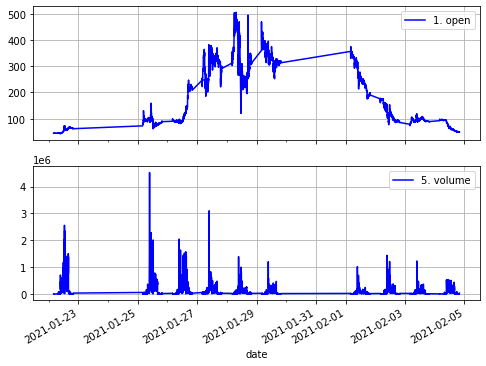

In [111]:
intraday_data[['1. open', '5. volume']].plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [113]:
intraday_data['1. open'].max()

505.0

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from datetime import date
dax = data.DataReader('^GDAXI', start='01/01/2000', data_source='yahoo')
dax.to_pickle('Dax_Panda') 
dax

In [53]:
import yfinance as yf
import pandas as pd

# Set the ticker symbol for the MSCI World Index (example: '^MSCI' or '^ACWI' if available)
# You may need to replace 'MSCI' with the correct ticker if it's different on Yahoo Finance
ticker = ".WORLD:MSCI"  # Use the appropriate MSCI index ticker if available
start_date = "2001-01-01"
end_date = "2024-10-31"

# Download historical data
msci_data2 = yf.download(ticker, start=start_date, end=end_date, interval="1mo")

# Filter for Adjusted Close column
msci_adjusted_close2 = msci_data2["Adj Close"]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['.WORLD:MSCI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [25]:

if isinstance(msci_adjusted_close, pd.DataFrame):
    print("x is a DataFrame")

x is a DataFrame


In [49]:
msci_adjusted_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2001-01-01 00:00:00+00:00 to 2022-10-01 00:00:00+00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ^990100-USD-STRD  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [69]:
msci_adjusted_close
msci_adjusted_close.index = msci_adjusted_close.index.tz_localize(None).strftime('%Y-%m-%d')
msci_adjusted_close.to_excel('MSCI_World_bis22.xlsx')

In [37]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD
Date,,,,,,
2024-11-10 00:00:00+00:00,3791.22998,3791.22998,3796.129883,3780.449951,3787.060059,0


In [63]:
import yfinance as yf

# Ticker für den MSCI World Index
ticker = 'URTH'

# Historische Daten herunterladen (monatlich) von 2000 bis heute
data = yf.download(ticker, start="2000-01-01", end="2024-10-31", interval="1mo")

# Falls du nur die Performance (z.B. Schlusskurse) möchtest, kannst du diese extrahieren:
performance_data = data['Close']

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          URTH       URTH       URTH       URTH   
Date                                                                    
2012-02-01 00:00:00+00:00  43.030937  55.000000  55.000000  52.959999   
2012-03-01 00:00:00+00:00  43.015297  54.980000  55.669998  54.070000   
2012-04-01 00:00:00+00:00  43.187408  55.200001  55.200001  52.970001   
2012-05-01 00:00:00+00:00  39.502396  50.490002  55.369999  50.160000   
2012-06-01 00:00:00+00:00  39.799709  50.869999  52.650002  49.320000   

Price                           Open Volume  
Ticker                          URTH   URTH  
Date                                         
2012-02-01 00:00:00+00:00  52.959999    700  
2012-03-01 00:00:00+00:00  55.000000   2400  
2012-04-01 00:00:00+00:00  54.980000   8100  
2012-05-01 00:00:00+00:00  55.369999  18500  
2012-06-01 00:00:00+00:00  50.490002   3700  


In [67]:
# Falls du nur die Performance (z.B. Schlusskurse) möchtest, kannst du diese extrahieren:
performance_data
performance_data.index = performance_data.index.tz_localize(None).strftime('%Y-%m-%d')
performance_data.to_excel('MSCI_World_ETF.xlsx')